<a href="https://colab.research.google.com/github/SongheeJo/aiffelthon/blob/main/jungin/very_simple_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')###

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import librosa as lb

import os

In [3]:
root = '/content/drive/MyDrive/aiffel/aiffelthon/' #기본 경로를 설정합니다
wav_path = root + 'processed_audio_files_8/' #패딩 안하고 나눈 데이터 경로, 패딩할 땐 이 파일을 씁니다
processed = pd.read_csv(root + 'processed.csv') #우리가 계속 쓸 컬럼입니다

##데이터 분석

##데이터 전처리

###패딩 안 넣고 자르는 코드(안돌려도 됩니다)
참고 코드에서 패딩과 관련된 부분 다 주석처리하면 됩니다.

이 친구는 .wav로 저장했습니다.

In [ ]:
import soundfile as sf
i,c=0,0
for index,row in data.iterrows(): #enumerte 과 비슷
    #maxLen=6 #여기서는 호흡 주기를 6초로
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    #If len > maxLen , change it to maxLen
    #if end-start>maxLen:
        #end=start+maxLen #시작점 + 6초에서 자름
    
    audio_file_loc=path + filename + '.wav' #wav 파일 경로 저장
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav' #새로운 파일 이름
    
    save_path='/content/drive/MyDrive/aiffel/aiffelthon/processed_audio_files_2/' + filename
    c+=1 #파일 개수 세기
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate) #잘린 데이터 return, 길이는 상관 없음
    
    #pad audio if pureSample len < max_len
    #reqLen=6*sampleRate
    #padded_data = lb.util.pad_center(pureSample, reqLen) #여기서 6초로 맞춤, 이거 대신에 smart padding을 넣어야할텐데...
    
    sf.write(file=save_path,data=pureSample,samplerate=sampleRate)
print('Total Files Processed: ',c)

###butter worth filter

###normalization

##패딩

###안돌려도 되는 셀

이건 processed.csv 에 crack_wheeze 컬럼을 추가하기 위해 만든 셀입니다.

In [ ]:
i,c=0,0
df = pd.DataFrame()
filename2 = []
start2 = []
end2 = []
crack_wheeze = []
for index,row in data.iterrows(): #enumerte 과 비슷
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    audio_file_loc=path + filename + '.wav' # 불러올 wav 파일 경로 저장
    
    if index > 0:

        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename = filename + '_' + str(i) + '.wav' #새로운 파일 이름

    df['filenames'] = filename

    filename2.append(filename)
    start2.append(row['start'])
    end2.append(row['end'])
    if row['crackles'] == 0 and row['weezels'] == 0:
      crack_wheeze.append(0)
    elif row['crackles'] == 1 and row['weezels'] == 0:
      crack_wheeze.append(1)
    elif row['crackles'] == 0 and row['weezels'] == 1:
      crack_wheeze.append(2)
    else:
      crack_wheeze.append(3)
    
    audioArr,sampleRate=lb.load(audio_file_loc)

print('Total Files Processed: ',c)

이건 패딩을 위한 셀입니다 

In [ ]:


sr=4000

#7초로 패딩하고 싶을 때 함수입니다
def zero_padding(pureSample, reqLen = 7 * sr): 
  padded = lb.util.pad_center(pureSample, reqLen)
  return padded

zero_padded_7sec = [] #시간에 따라 이름 바꿔주세요

for index,row in processed.iterrows():
  maxLen=7 #바꾸고 싶은 주기 5,6,7로 값 바꾸기
  start=row['start']
  end=row['end']
  filename=row['filename']
    
  audio_file_loc= wav_path + filename
  processed_sample, _ = lb.load(audio_file_loc, sr = sr) #아직 패딩 안 한 데이터를 불러옵니다

  #If len > maxLen , change it to maxLen
  if end-start>maxLen:
      end=start+maxLen
      processed_sample = processed_sample[int(start * sr) : int(end * sr)]
  
  #zero_pad = zero_padding(processed_sample)
  zero_padded_7sec.append(zero_padding(processed_sample, reqLen = 7 * sr)) #바꾸고 싶은 주기 5,6,7로 reqLen 값 바꾸기
  



In [ ]:
np.save(root + 'zero_padded_7sec.npy',zero_padded_7sec) #패딩할 때 오래 걸리니 넘파이 파일로 저장해줍니다, 시간에 따라 이름 바꿔주세요

In [ ]:
len(zero_padded_7sec) # 잘 되었는지 확인

##저장 해둔 패딩파일 불러오기
필요없는 부분이었다ㅜㅜ(실행 안하셔도 됩니다!)

In [4]:
zero_padded_5sec = np.load(root + 'zero_padded_5sec.npy') # 5초 제로패딩 sr = 4000
zero_padded_6sec = np.load(root + 'zero_padded_6sec.npy') # 6초 제로패딩 sr = 4000
zero_padded_7sec = np.load(root + 'zero_padded_7sec.npy') # 7초 제로패딩 sr = 4000

##질병 분류 & Crack_Weeze 분기점

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(zero_padded_7sec,processed.disease,stratify=processed.disease,random_state=42,test_size=0.2)

In [24]:
Xtrain_1,Xval_1,ytrain_1,yval_1=train_test_split(zero_padded_7sec,processed.crack_wheeze,stratify=processed.crack_wheeze,random_state=42,test_size=0.2)

In [25]:
Xtrain_1.crack_wheeze.value_counts()/Xtrain_1.shape[0]

AttributeError: ignored

In [26]:
Xtrain_2,Xval_2,ytrain_2,yval_2=train_test_split(processed,processed.disease,stratify=processed.disease,random_state=42,test_size=0.2)

In [56]:
Xtrain_3,Xval_3,ytrain_3,yval_3=train_test_split(processed,processed.crack_wheeze,stratify=processed.crack_wheeze,random_state=42,test_size=0.2)

In [58]:
Xtrain_3.crack_wheeze.value_counts()/Xtrain_3.shape[0]

0    0.527909
1    0.270207
2    0.128489
3    0.073396
Name: crack_wheeze, dtype: float64

In [59]:
Xtrain_3.shape,Xval_3.shape

((5518, 8), (1380, 8))

In [29]:
#object인 레이블(정답)의 자료형을 모델에 넣기 위해 숫자로 변환
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain_2=le.fit_transform(ytrain_2)
yval_2=le.transform(yval_2)

##augmentation(나중에)

##feature Extraction

In [8]:
sr = 4000


#이 값들 조정
frame_length = 0.025
frame_stride = 0.010

input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))

def Mel_S(padded_wav, frame_length = 0.025, frame_stride = 0.010): #제로패딩한 데이터 하나 씩 넣자
    # mel-spectrogram
    # y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    mel = librosa.feature.melspectrogram(y=padded_wav, n_mels=40, n_fft=input_nfft, hop_length=input_stride)#nfft는 푸리에 변환 개수
    #print("Wav length: {}, Mel_S shape:{}".format(len(padded_wav)/sr,np.shape(mel)))
    
    return mel

In [9]:
#train과 val의 mel을 각각 뽑습니다
Mel_spectrogram = []

for padded_wav in Xtrain_2:
  Mel_spectrogram.append(Mel_S(padded_wav))

Mel_spectrogram_val = []

for padded_wav in Xval_2:
  Mel_spectrogram_val.append(Mel_S(padded_wav))

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [10]:
#이것도 혹시 모르니 저장해 둡니다
np.save(root + 'Mel_spectrogram.npy',Mel_spectrogram)
np.save(root + 'Mel_spectrogram_val.npy',Mel_spectrogram_val)

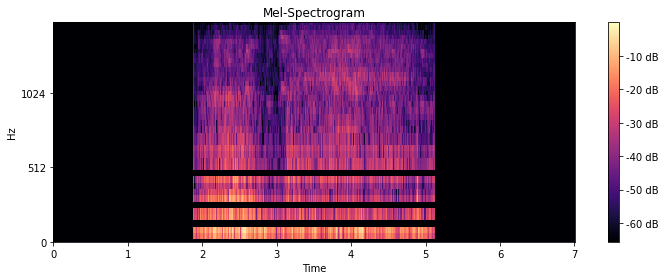

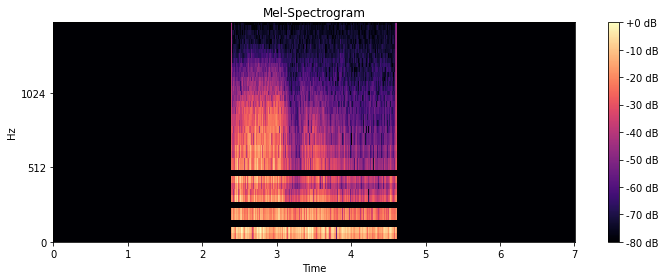

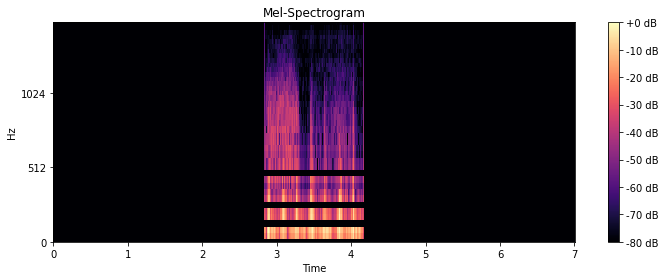

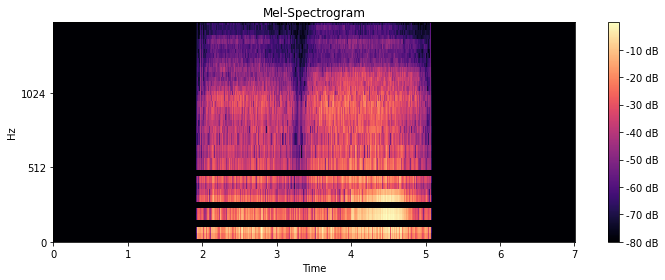

In [11]:
#랜덤으로 몇개 뽑아 봅니다. 검은 줄이 계속 가 있습니다ㅜ butterworth filter를 안해서 그런 걸까요? 아님 sr=4000은 너무 낮아서?
randFiles = [10 * x for x in range(1,5)]

for i,audioFile in enumerate(randFiles):
  
  plt.figure(figsize=(10, 4))
  plt.title('Mel-Spectrogram') 
  librosa.display.specshow(
      librosa.power_to_db(Mel_spectrogram[audioFile], ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  
  plt.tight_layout()
  plt.savefig('Mel-Spectrogram example.png')
  plt.show()

In [12]:
mSpec_train=np.array(Mel_spectrogram)
mSpec_val = np.array(Mel_spectrogram_val)

In [13]:
mSpec_train.shape, mSpec_val.shape

((5518, 40, 701), (1380, 40, 701))

In [30]:
ytrain_2.shape, yval_2.shape

((5518,), (1380,))

##모델

In [48]:
#주석 부분은 skip layer 시도했다가 잘 안돼서 주석처리한 것입니다.

mSpec_input=keras.layers.Input(shape=(40,701,1),name="mSpecInput") #(128,259,1)(40, 701, 1)
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input) # (64, 87, 32) (20, 233, 32)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) # (32, 43, 32) (10, 116,32)

#skip_x = x # (32, 43, 32)
#skip_x = keras.layers.Conv2D(96,3,strides=(2,4),padding='same')(skip_x) #(8, 11, 96) (5, 29, 96)####

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x) #(16, 22, 64) (10, 58, 64)###
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(8, 11, 64) (5, 29, 64)

x=keras.layers.Conv2D(96,2,padding='same')(x) #(8, 11, 96) (5, 29, 96)#####
#x = keras.layers.Add()([x,skip_x])
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x) #(4, 5, 96) (3, 14, 96)

x=keras.layers.Conv2D(128,2,padding='same')(x) #(4, 5, 128)(3, 14, 128)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.GlobalMaxPooling2D()(x) #(, 128) (, 128)

x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(50,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(25,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
output=keras.layers.Dense(8,activation='softmax')(x)


mSpec_model=keras.Model(mSpec_input, output, name="mSpecModel")

In [49]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mSpecInput (InputLayer)     [(None, 40, 701, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 20, 234, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 20, 234, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 234, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 117, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 59, 64)        1

##학습

In [50]:
accuracy='sparse_categorical_accuracy'
sparseLoss=keras.losses.SparseCategoricalCrossentropy()

from keras import backend as K
K.clear_session()
mSpec_model.compile(optimizer='nadam', loss=sparseLoss, metrics=[accuracy])
K.set_value(mSpec_model.optimizer.learning_rate, 0.001)

In [51]:
file_name = '/content/drive/MyDrive/aiffel/aiffelthon/model/checkpoint-only-zero-001.h5'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-12,mode='min'), #미분하다 막히면 lr 변경해줌
    tf.keras.callbacks.ModelCheckpoint(file_name, monitor='val_loss', verbose=0, save_best_only=True,)
]

In [52]:
history=mSpec_model.fit(
    mSpec_train, # fit 할 때 ndarray > tensor로 바꾸는 느낌?
    ytrain_2,
    validation_data=(mSpec_val,yval_2),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
173/173 [==============================] - 6s 18ms/step - loss: 0.8128 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.8287 - val_sparse_categorical_accuracy: 0.8333 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 2s 14ms/step - loss: 0.6809 - sparse_categorical_accuracy: 0.8313 - val_loss: 0.7257 - val_sparse_categorical_accuracy: 0.8333 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 2s 13ms/step - loss: 0.6249 - sparse_categorical_accuracy: 0.8320 - val_loss: 0.5955 - val_sparse_categorical_accuracy: 0.8333 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 2s 13ms/step - loss: 0.5890 - sparse_categorical_accuracy: 0.8327 - val_loss: 1.8371 - val_sparse_categorical_accuracy: 0.8333 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 2s 13ms/step - loss: 0.5822 - sparse_categorical_accuracy: 0.8329 - val_loss: 2.8390 - val_sparse_categorical_accuracy: 0.8333 - lr: 0.0010
Epoch 6/100
173/173 [====

In [53]:
y_pred = mSpec_model.predict(mSpec_val)

In [54]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(np.argmax(y_pred, axis = 1), yval_2)

array([[   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   21,   32, 1150,   64,    6,   57,   49],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]])

In [55]:
from sklearn.metrics import classification_report

target_names=['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis', 'Pheumonia', 'Bronchiolitis']
clf_report = classification_report(yval_2, np.argmax(y_pred, axis = 1), target_names=target_names, output_dict=True)
print(classification_report(yval_2, np.argmax(y_pred, axis = 1), target_names=target_names))

                precision    recall  f1-score   support

          URTI       0.00      0.00      0.00         1
       Healthy       0.00      0.00      0.00        21
        Asthma       0.00      0.00      0.00        32
          COPD       0.83      1.00      0.91      1150
          LRTI       0.00      0.00      0.00        64
Bronchiectasis       0.00      0.00      0.00         6
     Pheumonia       0.00      0.00      0.00        57
 Bronchiolitis       0.00      0.00      0.00        49

      accuracy                           0.83      1380
     macro avg       0.10      0.12      0.11      1380
  weighted avg       0.69      0.83      0.76      1380



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat